# Limpieza, categorización y escalado de características
Este nootbok contiene los pasos que se han seguido para hacer el tratamiento inicial de datos, la separación en train y test y la generación de características.

## Carga de dataset
Creamos una función que use pandas para cargar el dataset en un dataframe de Pandas

In [2]:
import pandas as pd
import os

pd.set_option('display.max_columns', None)

# Carga el dataset y devuelve un dataframe de Pandas
def load_dataset(ruta, nombre, separador):
    csv_path = os.path.join(ruta, nombre)
    return pd.read_csv(csv_path, sep=separador)

In [3]:
df = load_dataset('datasets', 'db_practica_kc_public_dataset_final.csv', ',')
df.head()

,id,type,popularity,vote_count,poster_path,adult,backdrop_path,original_language,original_title,title,vote_average,overview,release_date,budget,imdb_id,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2
0,666750,Movie,124.936,36,/qZ1KAgfdeNbzrNYKW4BIRHdEBJ9.jpg,False,/6mKAKhj8POVGqV1GsroS5mGIUe9.jpg,en,Dragonheart: Vengeance,Dragonheart: Vengeance,6.0,"Lukas, a young farmer whose family is killed b...",2020-02-04,0.0,tt9711106,..\img\666750.jpg,Helena Bonham Carter,Richard Ashton,Joseph Millson,Tam Williams,Ross O'Hennessy,Arturo Muselli,Carolina Carlsson,Fabienne Piolini-Castle,Jack Kane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fantasy,NaN,NaN,NaN
1,8618,Movie,7.388,114,/AZvkyBkqSUTyJgePwDHL3R5snj.jpg,False,/uDCZppEnWorFzO70sGW6zZfh4FH.jpg,en,The History Boys,The History Boys,6.8,"The story of an unruly class of bright, funny ...",2006-10-02,4000000.0,tt0464049,..\img\8618.jpg,Penelope Wilton,Patrick Godfrey,Clive Merrison,Richard Griffiths,Adrian Scarborough,Jamie Parker,Frances de la Tour,Samuel Anderson,James Corden,Stephen Campbell Moore,Andrew Knott,Russell Tovey,Dominic Cooper,Samuel Barnett,Sacha Dhawan,Georgia Taylor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Drama,DNA Films,BBC Films
2,342470,Movie,107.119,214,/4SafxuMKQiw4reBiWKVZJpJn80I.jpg,False,/tcrNJfyNEIqaBR8Ogkgnq5xQJnf.jpg,en,All the Bright Places,All the Bright Places,7.6,Two teens facing personal struggles form a pow...,2020-02-28,0.0,tt3907584,..\img\342470.jpg,Elle Fanning,Luke Wilson,Kelli O'Hara,Keegan-Michael Key,Justice Smith,Alexandra Shipp,Virginia Gardner,Lamar Johnson,Felix Mallard,Sofia Hasmik,Ming Wang,Alex Haydon,Brian Andrus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romance,Drama,Echo Lake Entertainment,Mazur / Kaplan Company
3,475557,Movie,98.211,9521,/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg,False,/n6bUvigpRFqSwmPp1m2YADdbRBc.jpg,en,Joker,Joker,8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02,55000000.0,tt7286456,..\img\475557.jpg,Robert De Niro,Frances Conroy,Peter Benson,Josh Pais,April Grace,Justin Theroux,Brett Cullen,Richard Baratta,Frank Wood,Joaquin Phoenix,Shea Whigham,Bryan Callen,Douglas Hodge,Keith Buterbaugh,Bill Camp,Sharon Washington,Murphy Guyer,Ray Iannicelli,Blaise Corrigan,Kim Brockington,Sondra James,Jeff McCarthy,John Cenatiempo,Brian Tyree Henry,Jolie Chan,Hannah Gross,Gary Gulman,Brendan Patrick Connor,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,Crime,Thriller,DC Entertainment,Warner Bros. Pictures
4,38700,Movie,89.839,1021,/y95lQLnuNKdPAzw9F9Ab8kJ80c3.jpg,False,/upUy2QhMZEmtypPW3PdieKLAHxh.jpg,en,Bad Boys for Life,Bad Boys for Life,6.3,Marcus and Mike are forced to confront new thr...,2020-01-15,90000000.0,tt1502397,..\img\38700.jpg,Joe Pantoliano,Michael Bay,Will Smith,Theresa Randle,Alexander Ludwig,Kate del Castillo,Vanessa Hudgens,Martin Lawrence,DJ Khaled,Paola Nuñez,Massi Furlan,Happy Anderson,Jennifer Badger,Bianca Bethune

Vemos que el dataset se ha cargado correctamente. Cada fila corresponde a una película y la primera fila son los nombres de las columnas.


## Estructura de los datos
Vamos a ver la estructura de los datos con la instrucción **info**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   type               10000 non-null  object 
 2   popularity         10000 non-null  float64
 3   vote_count         10000 non-null  int64  
 4   poster_path        9902 non-null   object 
 5   adult              10000 non-null  bool   
 6   backdrop_path      9757 non-null   object 
 7   original_language  10000 non-null  object 
 8   original_title     10000 non-null  object 
 9   title              10000 non-null  object 
 10  vote_average       10000 non-null  float64
 11  overview           9953 non-null   object 
 12  release_date       9994 non-null   object 
 13  budget             9999 non-null   float64
 14  imdb_id            9885 non-null   object 
 15  local_poster_path  9902 non-null   object 
 16  actor1             9907

Por la columna id parece que el dataset tiene 10.000 observaciones y que algunas columnas tienen valores nulos, también se aprecian 75 variables.

La variable **vote_average** (nuestra variable objetivo) no tiene ningún valor nulo, por lo que no hay ninguna película sin valoración.

Hay muchas variables de tipo object, pero viniendo de un csv, seguramente sean variables de texto.

## Detección de variables categóricas
Vamos a recorreronos todas las variables no numéricas del dataset para detectar variables categóricas.

In [5]:
# Seleccionamos las variables no numéricas
no_numeric = df.select_dtypes(exclude ='number')

for i in no_numeric.columns:
    print(no_numeric.loc[:,i].value_counts())

Movie    10000
Name: type, dtype: int64
/3x4iJfLhFcvewNuvVLF2O1HGYyw.jpg    1
/g1wvC9RyapnPQBgKcFJ3FChPEeC.jpg    1
/7D6hM7IR0TbQmNvSZVtEiPM3H5h.jpg    1
/d8as1GtCAhlc5rirarnUUd85gJA.jpg    1
/4ry96PlfzAsO93dZ1Cf1pRmCpNJ.jpg    1
                                   ..
/8zkJyC4xImfnYJREDQTfW09m8A5.jpg    1
/ozGjFX91USmwJW0Dj6fsUvYmHSg.jpg    1
/ysTohGF7NY9Z6MYz9vLNYiyzh0r.jpg    1
/36xWcRUXswUPnvm1tCO3IWO39Dz.jpg    1
/b5IyizEBveh2ZE2SEo9O4sJ4CHi.jpg    1
Name: poster_path, Length: 9902, dtype: int64
False    10000
Name: adult, dtype: int64
/oRvtAJ5A0PqI3aKu23HyacjaQUz.jpg    1
/bBIVXF96zbNtXmoAdMfstKAfMXU.jpg    1
/wtNG2gTXr70EAOficmv9iDz8Piy.jpg    1
/uPvNJSeQHlvvBOMehBNPIzQ40dh.jpg    1
/u2A2W5Fge3LeBOoqTYSkr2ztpHu.jpg    1
                                   ..
/ax6TJuFqiuPruL8Lsqg4Kq8U3tK.jpg    1
/oTptxeSkwOU3zbJDmrZfcbEYI7p.jpg    1
/Aq8OAi9exLkX75pb7uJa49AwUGF.jpg    1
/dFyEwLUOeFolYsySpXIfGkhteiM.jpg    1
/1yu8Tsy8UNKoisIlQLIozoA8vl8.jpg    1
Name: backdrop_path, Length: 9757, dt

A simple vista, podemos observar que las siguientes variables son categóricas:
 - original_languaje
 - columnas de actores actores
 - nombres de las productoras
 - los géneros de los actores no son numéricos, pero en la ingesta vimos que también es categórica

## Analizar variables numéricas

In [6]:
df.describe()

,id,popularity,vote_count,vote_average,budget,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28
count,10000.00000,10000.00000,10000.000000,10000.000000,9.999000e+03,9907.000000,9843.000000,9791.000000,9732.000000,9619.000000,9486.000000,9332.000000,9129.000000,8885.000000,8631.000000,8312.000000,7989.000000,7608.000000,7230.000000,6877.000000,6366.000000,5921.000000,5526.000000,5188.000000,4880.000000,4488.000000,4234.000000,3972.000000,3742.000000,3504.000000,3292.000000,3101.000000,2934.000000
mean,159302.91180,11.10129,985.153600,6.235820,1.974594e+07,1.661754,1.620441,1.588295,1.540896,1.513047,1.475754,1.451457,1.415051,1.370287,1.353377,1.310876,1.289773,1.238302,1.208575,1.188891,1.163054,1.162473,1.140970,1.111218,1.077049,1.059269,1.031412,1.021652,0.999466,0.997146,0.955954,0.928733,0.917860
std,201852.26091,16.25509,1950.743139,1.488786,3.534086e+07,0.544000,0.587235,0.617039,0.650267,0.667325,0.695791,0.721771,0.736281,0.764015,0.781759,0.798167,0.805136,0.829564,0.837418,0.850831,0.852034,0.856188,0.861986,0.873404,0.874478,0.878923,0.882250,0.883569,0.887406,0.888274,0.895753,0.891763,0.892291
min,2.00000,6.65000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10282.50000,7.54850,127.000000,5.800000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30951.00000,8.83200,305.000000,6.400000,5.000000e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,323674.25000,11.78550,896.000000,7.100000,2.500000e+07,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,677596.00000,1403.18500,24659.000000,10.000000,3.800000e+08,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Muestro el histograma de cada variable numérica:

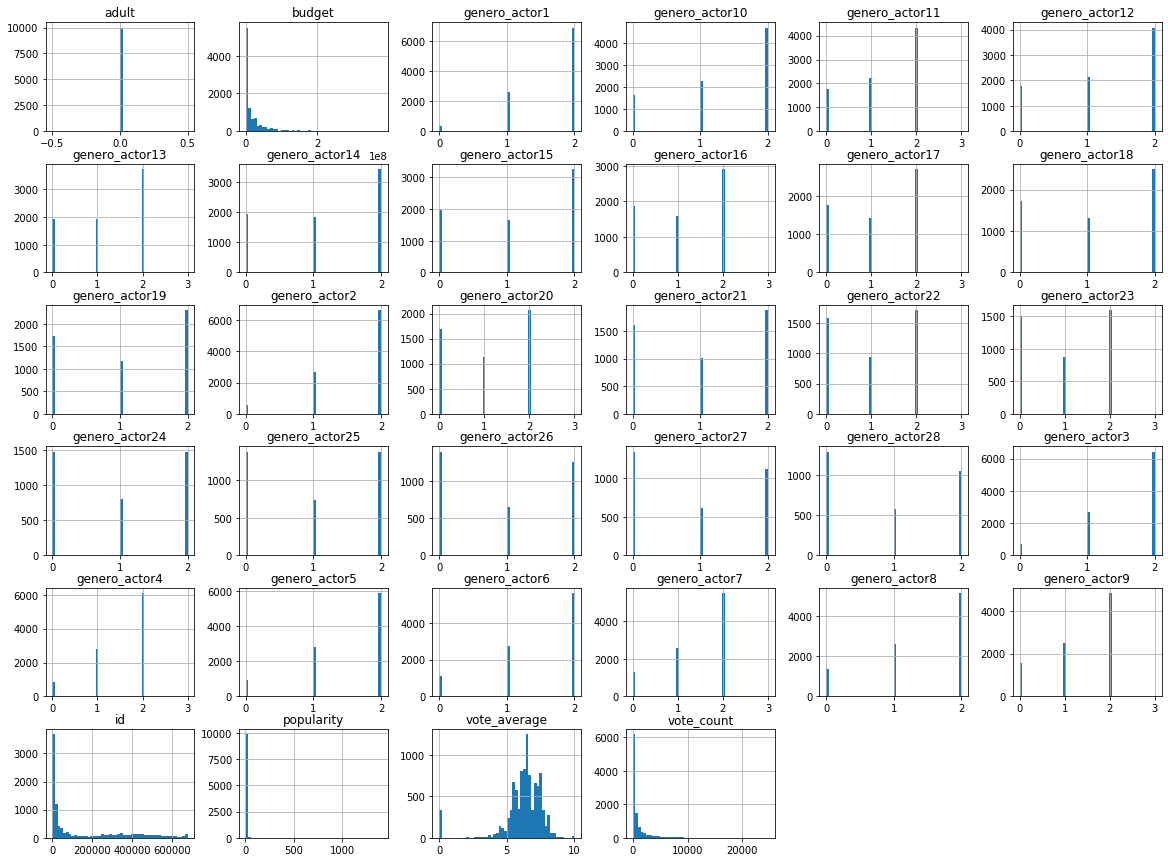

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Si analizamos el histrograma de nuestra variable objetivo **vote_average** vemos que la mayoría de valoraciones está entre 5 y 8 y que no hay ninguna mayor de 10. En cambio sí hay alguna con 0.

# División del dataset en train y test
Antes de entrar a mirar valores de cada variable, dividimos el dataframe en dos partes, una para entrenamiento y otra para pruebas. Hacemos este paso antes de mirar los datos para no tropezarnos con algún patrón en ellos y enfocar nuestro modelo erróneamente.

Importante en la división establecer una semilla (random_state) concreta para poder replicar la separación siempre de la misma forma para que en el caso de auditar el modelo, podamos conseguir siempre la misma división.

La librería Scikit-Learn tiene una función muy útil para hacer la separación.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

# Guardo en csv la separación
train_set.to_csv('./datasets/train.csv', sep=';', decimal='.', index=False)
test_set.to_csv('./datasets/test.csv', sep=';', decimal='.', index=False)

In [10]:
import pandas as pd
import os

# Leo desde el csv de train
train_set = pd.read_csv('./datasets/train.csv', sep=';', decimal='.')